# 第15章 向量自回归与VEC模型

## 1.向量自回归与整合变量（Integrated Variables）

在这一章中，我们需要讨论带有I(1)的向量自回归过程。一般VAR模型的过程为
    一个n维时间序列${{Y_t}}$， 而且$$Y=C+\theta _{1}Y_{t-1}+\theta _{2}Y_{t-2}...+\theta _{p}Y_{t-p}+\varepsilon _{t}$$


其中$$E(\varepsilon )=0, E(\varepsilon {\varepsilon }')=\left\{\begin{matrix}
\pi  &  t=\tau  \\ 0
 &  t\neq \tau
\end{matrix}\right.$$


$\varepsilon$ 在不同时刻独立同分布，且服从正态分布，则称为p阶向量自回归模型。 


向量自回归模型的一般步骤为
* 对原始数据进行平稳性检验，也就是ADF检验
* 对应变量和自变量做协整检验
* LR（long-run）定阶
* 估计参数


In [1]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')#获取数据
dta.index = dta.qtr
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [4]:
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/root/anaconda3/envs/jupyter_notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 361.038
Date:                    Wed, 12 Aug 2020   AIC                           -696.077
Time:                            17:59:20   BIC                           -665.949
Sample:                        04-01-1960   HQIC                          -684.047
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                61.24, 39.25   Jarque-Bera (JB):          11.14, 2.41
Prob(Q):                        0.02, 0.50   Prob(JB):                   0.00, 0.30
Heteroskedasticity (H):         0.45, 0.40   Skew:                      0.16, -0.38
Prob(H) (two-sided):            0.05, 0.03   Kurtosis:                   4.86, 3.44


以上 为VAR（2）的一个估计实例

## 向量自回归与协整变量（Cointegrated Variables）

**协整** ：如果所考虑的时间序列具有相同的单整阶数，且某种协整向量使得组合时间序列的单整阶数降低，则称这些时间序列之间存在显著的协整关系。

### Example15.2

首先用VAR（2）估计rs 与rs20 这两个向量。估计时使用C作为外生变量。

In [3]:
df=pd.read_excel("/root/experiment01/rs1.xlsx")
df.head()
df.tail()

,_date_,rs,r20,c,resid
823,2020-08-01,NaN,NaN,0.0,NaN
824,2020-09-01,NaN,NaN,0.0,NaN
825,2020-10-01,NaN,NaN,0.0,NaN
826,2020-11-01,NaN,NaN,0.0,NaN
827,2020-12-01,NaN,NaN,0.0,NaN


In [84]:
endog=df[['rs', 'r20']].dropna()
ex=df["c"][:len(endog)]
endog
ex

0     -0.012296
1      0.233268
2     -0.081877
3     -0.113973
4      0.007990
         ...   
781    0.000000
782    0.000000
783    0.000000
784    0.000000
785    0.000000
Name: c, Length: 786, dtype: float64

In [16]:
mod = sm.tsa.VARMAX(endog, order=(2,0), trend='n', exog=ex)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:          ['rs', 'r20']   No. Observations:                  828
Model:                        VARX(2)   Log Likelihood                -471.867
Date:                Wed, 12 Aug 2020   AIC                            969.733
Time:                        19:22:00   BIC                           1031.080
Sample:                             0   HQIC                           993.262
                                - 828                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):      1663.06, 188.00
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.17, 0.60   Skew:                      1.14, -0.18
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   9.75, 5.37
                           Resul

In [19]:
# 使用VAR(3)估计
mod = sm.tsa.VARMAX(endog, order=(3,0), trend='n', exog=ex)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:          ['rs', 'r20']   No. Observations:                  828
Model:                        VARX(3)   Log Likelihood                -465.030
Date:                Wed, 12 Aug 2020   AIC                            964.061
Time:                        19:39:24   BIC                           1044.284
Sample:                             0   HQIC                           994.829
                                - 828                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):      1694.47, 168.11
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.17, 0.57   Skew:                      1.18, -0.13
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   9.80, 5.25
                           Resul

# Example 15.3

检验VECM模型在英国利率上的表现


In [1]:
from statsmodels.tsa.vector_ar.vecm import VECM
model = VECM(endog = endog, k_ar_diff = 7, coint_rank = 6, deterministic = 'co')
res = model.fit()

X_pred = res.predict(steps=10)
X_pred

NameError: name 'endog' is not defined

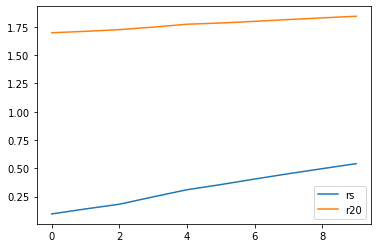

In [128]:
#预测结果
plt.plot(X_pred)
plt.legend(['rs',"r20"])
plt.show()

# Example15.4


In [11]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR,SVAR


In [65]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [88]:
model = VAR(endog)
results = model.fit(3)

In [72]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Aug, 2020
Time:                     21:16:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.39319
Nobs:                     783.000    HQIC:                  -4.44450
Log likelihood:          -455.483    FPE:                  0.0113724
AIC:                     -4.47656    Det(Omega_mle):       0.0111718
--------------------------------------------------------------------
Results for equation rs
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.005228         0.036862           -0.142           0.887
L1.rs          1.199313         0.040129           29.886           0.000
L1.r20         0.294782         0.061048            4.829           0.000
L2.rs         -0.

In [73]:
#results.plot()

In [74]:
res=results.test_causality('rs', ['r20', 'rs'], kind='wald')
print(res)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause rs: reject at 5% significance level. Test statistic: 62868.469, critical value: 12.592>, p-value: 0.000>


In [75]:
results.to_vecm()

{'Gamma': array([[ 0.22646186,  0.27155938,  0.0388359 , -0.07699749],
        [-0.01356378,  0.31604068,  0.01984455, -0.13601057]]),
 'Pi': array([[-0.02714869,  0.02322247],
        [ 0.00392675, -0.00676172]])}

# 15.5 LA-VAR causality tests for U.K. interest rates

In [56]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
model = VAR(endog)
results = model.fit(4)
res=results.test_causality('rs', ['r20', 'rs'])
print(res)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause rs: reject at 5% significance level. Test statistic: 7827.480, critical value: 1.944>, p-value: 0.000>


# 15.6 

待解决

In [102]:
from statsmodels.tsa.vector_ar.vecm import VECM
model = VECM(endog = endog, k_ar_diff = 2, coint_rank = 1, deterministic = 'co')
res = model.fit()
res.conf_int_det_coef_coint()

array([], shape=(0, 1), dtype=[('lower', '<f8'), ('upper', '<f8')])

# 15.7

In [2]:
data=pd.read_excel("/root/experiment01/trf1.xlsx")

data=data.drop(columns = ['_date_'])
data=data.dropna()
data

,trf,temp,c,volc,amo,soi
0,0.155966,0.058267,0.309571,0.219079,0.205083,-0.025000
1,0.150523,-0.010733,0.083041,0.229017,0.143583,-0.008333
2,0.173692,0.072267,0.026940,0.231073,0.155917,-0.138333
3,0.217857,0.041267,0.132820,0.222848,0.097083,0.062500
4,0.251133,0.028267,0.188829,0.218736,0.020000,-0.026667
...,...,...,...,...,...,...
145,2.282982,0.725267,0.390467,0.000000,0.101667,0.228333
146,2.342985,0.773267,0.390467,0.000000,0.213333,-0.019167
147,2.374454,0.802267,0.390467,0.000000,0.166500,0.041667
148,2.376194,0.870267,0.390467,0.000000,0.102250,-0.068333


In [3]:
endog=data[['trf', 'temp']].copy()
exo=data[["volc", "soi", "amo"]].copy()
amo=data["amo"].copy()

In [4]:
exo["amo(-1)"]=amo.shift(-1)

endog=endog[:-1]

In [5]:
exo=exo.dropna()
exo



,volc,soi,amo,amo(-1)
0,0.219079,-0.025000,0.205083,0.143583
1,0.229017,-0.008333,0.143583,0.155917
2,0.231073,-0.138333,0.155917,0.097083
3,0.222848,0.062500,0.097083,0.020000
4,0.218736,-0.026667,0.020000,0.033167
...,...,...,...,...
144,0.000000,0.132500,0.348917,0.101667
145,0.000000,0.228333,0.101667,0.213333
146,0.000000,-0.019167,0.213333,0.166500
147,0.000000,0.041667,0.166500,0.102250


In [31]:
model = statsmodels.tsa.vector_ar.vecm.VECM(endog,exog=exo,k_ar_diff = 4, coint_rank = 2, deterministic = 'co')
results = model.fit()
print(results.summary(alpha=0.05))

Det. terms outside the coint. relation & lagged endog. parameters for equation trf
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.002     -2.026      0.043      -0.007      -0.000
exog1         -0.0024      0.003     -0.826      0.409      -0.008       0.003
exog2          0.0008      0.008      0.111      0.912      -0.014       0.016
exog3         -0.0113      0.007     -1.650      0.099      -0.025       0.002
exog4          0.0020      0.006      0.308      0.758      -0.011       0.015
L1.trf         1.4602      0.071     20.644      0.000       1.322       1.599
L1.temp        0.0180      0.011      1.637      0.102      -0.004       0.039
L2.trf        -1.3739      0.122    -11.220      0.000      -1.614      -1.134
L2.temp        0.0148      0.010      1.499      0.134      -0.005       0.034
L3.trf         0.8562      0.123      6.944     

In [20]:
test=results.test_causality('trf', ['trf', 'temp'], kind='wald')
print(test)
data["c"]

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause trf: reject at 5% significance level. Test statistic: 529094.027, critical value: 18.307>, p-value: 0.000>


0      0.309571
1      0.083041
2      0.026940
3      0.132820
4      0.188829
         ...   
145    0.390467
146    0.390467
147    0.390467
148    0.390467
149    0.390467
Name: c, Length: 150, dtype: float64